# IA Notebook #3 - Programando una Red Neuronal desde Cero
El problema a resolver está planteado en el [este enlace](https://youtu.be/uwbHOpp9xkc?t=500), básicamente, lo que se quiere es separar en dos grupos de puntos un conjunto de puntos. Un problema de clasificación.

Para ello, primero haremos nuestro datasets y luego la red neuronal como tal. ;3

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

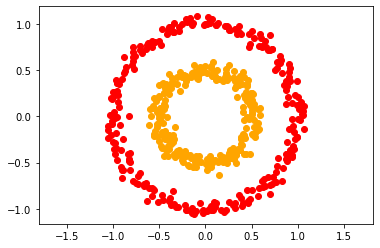

In [6]:
#************Creamos el dataset************

#Número de registos que tenemos en nuestros datos:
n=500
#Número de características que tenemos sobre cada uno de nuestros datos:
p=2
#Para este ejercicio que se está desarrollando a modo de ejemplo, solo trabajamos con dos características
#para poder dibujarlas en un plano 2D, a mayor número de características, mayor las dimensiones.

#Para consultar los parametros de la función hacemos:
#make_circle?
#Nuestro dataset estará conformada por una entrada "x" y una salida "y":
x, y = make_circles(n_samples=n, noise=0.05, factor=0.5)

# Aquí corregimos la variable "y" que viene a ser de la forma (500, )
y = y[:, np.newaxis] #Y ahora lo convertimos en un vector como tal -> (500, 1)
#print(y.shape) #Para verificarlo podemos ejecutar esto.

#Para visualizar como van quedando los datos, dibujamos:
#plt.scatter(x[:, 0], x[:, 1], c="orange")
#plt.scatter(x[:, 1], x[:, 0], c="red") #Solo lo puse a modo de prueba :3
#plt.show()

#Pero continuando con el ejercicio: (Y haciendo la correción de la "y")
#plt.scatter(x[y==0, 0], x[y==0, 1], c="red") #Con esto le decimos que solo dibuje uno de los circulos
plt.scatter(x[y[:, 0]==0, 0], x[y[:, 0]==0, 1], c="red")
#plt.scatter(x[y==1, 0], x[y==1, 1], c="orange")
plt.scatter(x[y[:, 0]==1, 0], x[y[:, 0]==1, 1], c="orange")
plt.axis("equal") #Con esto le decimos que esten en la misma proporción ambos ejes
plt.show()

---
##### Otra vez, haciendo aquí unas pruebas:

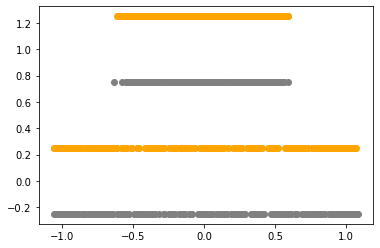

In [7]:
#print(y[:, 0])
#print(y)
plt.scatter(x[:, 0], y+0.25, c="orange")
plt.scatter(x[:, 1], y-0.25, c="gray")
plt.show()

---
## Continuando...
Ahora si, a programar la red neuronal! :D

In [8]:
#***********Estructura de datos que contiene nuestros parámetros de la red neuronal***********
#No es necesario heredar de la clase "object" porque ya lo hace automáticamente:
class neural_layer(): #Clase de la capa de la red neuronal
  #Aquí podría inicializar los atributos:
  n_conn=n_neur=act_f=0.0
  b=w=np.zeros(1) #Definiendo a "b" y "w" como matrices o vectores unitarios con valor 0
  #Y podría usar este constructor:
  def __init__(self, numConn, numNeur, funcAct): #El cual SI FUNCIONA!
  #def __init__(self, n_conn, n_neur, act_f):
    #n_conn: número de conexiones que vienen de una capa anterior.
    #n_neur: número de neuronas en nuestra capa
    #act_f: función de activación en nuestra capa

    self.act_f = funcAct
    #self.act_f = act_f #Pero hacer las cosas de esta manera es más sencillo

    self.n_conn=numConn #Sin embargo, así creo que es más formal.
    self.n_neur=numNeur #Y lo es, pero Python es tan versátil que ni es necesario hacerlo.
    #Así que estás líneas solo fueron opcinoales, podría hacerlo mucho más directo.
    #Claro, solo con Python, otros lenguajes son más estrictos.

    #Vector de vallas:
    self.b = np.random.rand(1, numNeur)*2 -1
    #self.b = np.random.rand(1, n_neur)*2 -1 #Esto es solo por si acaso falla.
    #rand varía de 0 a 1 por eso se multiplica y resta para trabajar con red normalizada y estandarizada.
    #Ya que estos serán los parámetros con los que inicializará la red neuronal
    #(No lo apunté pero...) Este sería el vector de pesos:
    self.w = np.random.rand(numConn, numNeur)*2 -1
    #self.w = np.random.rand(numConn, numNeur)*2 -1 #Esto es solo por si acaso falla.

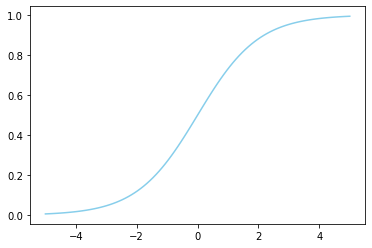

In [10]:
# Funciones de activación (Si uno quiere puede definir más para hacer las pruebas)
sigmoide = (#Función sigmoide
            lambda x: 1/(1+np.e**(-x)),
            #Derivada de la función sigmoide
            lambda x: x*(1-x))
relu = lambda x: np.maximum(0, x)

#Vector o matriz con 100 valores de -5 a 5
_x=np.linspace(-5, 5, 100)

#plt.plot(_x, relu(_x), c="red")
plt.plot(_x, sigmoide[0](_x), c="skyblue")
#plt.plot(_x, sigmoide[1](_x), c="blue")
plt.show()

In [11]:
#Se podría crear capa por capa de manera manual:
#Capa 0
#l0 = neural_layer(p, 4, sigmoide)
#El primer parámetro es "p" porque es la cantidad de características que tenemos sobre nuestros datos.
#Capa 1
#l1 = neural_layer(4, 8, sigmoide)
#La cantidad es ahora 4 porque el número de neuronas de la anterior capa es igual
#Y el número de conexiones debe ser mínimo a esa cantidad.

#---------------------------------------------------------
#O hacerlo iterativo y para ello:

#Creamos este vector o lista o matriz, que definirá el número de neuronas por cada capa:
#topologia = [p, 4, 8, 16, 8, 4, 1] #El número ha sido arbitrario para este caso.
#Y se comentá aquí solo para mantener una estética.

#No necesariamente todas las capas deben tener la misma función de activación
#Para este ejemplo si, por simplicidad:
def crear_redNeuronal(topology, activation_function): #O "create_nn" en inglés.
  #red_neuronal -> rn o en inglés: neural_network -> nn
  nn=[]
  #Ahora un bucle para recorrer todos lo valores y crear la red:
  for indiceCapa, capa in enumerate(topology[:-1]): #Con el -1 le digo que recorra todo menos el último.
    nn.append(neural_layer(topology[indiceCapa], topology[indiceCapa+1], activation_function))
  
  return nn

#Aquí lo colocamos más ordenado: (pero nuevamente lo movemos y ahora al siguiente segmento)
#topologia = [p, 4, 8, 16, 8, 4, 1]
#Y creamos red neuronal:
#crear_redNeuronal(topologia, sigmoide)

In [12]:
#Se define la topología:
#topologia = [p, 4, 8, 16, 8, 4, 1]
#Creamos la red neuronal:
#red_neuronal=crear_redNeuronal(topologia, sigmoide) #red_neuronal -> rn
#Todo esto anterior se usó para probar la función "entrenar".

#Definimos dos funciones de coste (vamos a usar el error cuadrático medio)
#La primera será la función como tal y la segunda será su derivada:
i2_cost = (
    #Error cuadrático medio:
    lambda Ypredicha, Yreal: np.mean((Ypredicha-Yreal)**2), #Opera y luego cálcula la media.
    #Derivada del error cuadrático medio:
    lambda Ypredicha, Yreal: Ypredicha-Yreal
)

#Recordar que el "lr" es el largo del paso que damos en el "Descenso del gradiente"
def entrenar(rn, _x, _y, func_Coste, lr=0.5, train=True):
  #En este vector guardaremos esta información:
  #out = [(z0, a0), (z1, a1), etc]
  #Esta información representa lo procesado en cada capa.
  out = [(None, _x)] #Es el caso inicial, ya que en la primera capa no hay iteración.
  
  #Forward pass, básicamente ir ejecutando capa por capa nuestra red, pasando el vector de entrada
  for indiceL, L in enumerate(rn):
    #Y recordar que el hacer esto, es aplicar una suma ponderada seguida de la función de activación
    #Dicha suma ponderada, la llamaremos "z":
    z = out[-1][1] @ rn[indiceL].w + rn[indiceL].b
    #z = _x @ rn[0].w + rn[0].b #Así sería de manera individual con "_x".
    #z = out[0][1] @ rn[0].w + rn[0].b #Y así con "out".
    #Es un producto matricial: "_x" @ "w"
    
    #Activación:
    a = rn[indiceL].act_f[0](z) #Recordar que nuestra act_f es una tupla con dos valores
    #a = rn[0].act_f[0](z) #Así sería de manera individual.
    #Todo lo guardamos en out:
    out.append((z, a))

  #print(out)
  #print("---------------------------------------------")
  #print(out[-1][1]) #Con esto vemos el primera elemento del úlitmo resultado
  #y dicho elemento es justamente la última matriz generada ya con todos los datos.
  
  #print(func_Coste[0](out[-1][1], _y)) #Con esto podemos visualizar cuanto es el error promedio.

  if train: #Esto parte si es el entrenamiento como tal, lo anterior es solo para obtener un resultado.
    #Backward pass
    deltas = [] #Este será el vector con los errores calculados a partir de derivadas parciales.

    for iL in reversed(range(0, len(rn))):
      _z=out[iL+1][0]
      _a=out[iL+1][1]
      #print(_z.shape)
      #print(_a.shape)

      #Ya que para la última capa se le aplica una derivada un poco diferente a las demás
      #Es que se hace la siguiente condición:
      if iL == len(rn)-1:
        #Calcular delta (derivada) en la última capa:
        deltas.insert(0, func_Coste[1](_a, _y)*rn[iL].act_f[1](_a))
        #_w = rn[iL].w
      else:
        #Calcular delta (derivada) respecto a capa previa:
        deltas.insert(0, deltas[0]@_w.T * rn[iL].act_f[1](_a))
        #Se inserta siempre en 0 para ir desplazando los demás resultados.
        #deltas.insert(0, _w@deltas[0] * rn[iL].act_f[1](_a))

      _w = rn[iL].w #Con esto vamos actualizando nuestros pesos.

      #Gradient descent (Recordar que el gradiente es el vector que contiene a las pendientes)
      #np.mean: calcula medias | axis: le dice que eje, del (500, 1) el 500
      #keepdims: para que no lo convierta en serie, ejemplo de serie: (500, )
      #y "lr" el cual es los pasos que daremos por cada iteración, ya lo vimos en el capítulo anterior.
      rn[iL].b = rn[iL].b - np.mean(deltas[0], axis=0, keepdims=True) * lr #Básicamente: theta=theta-gradiente*lr
      #Y de manera similar con "w":
      rn[iL].w = rn[iL].w - out[iL][1].T@deltas[0] * lr #Con esto comenzamos a distribuir el error a las demás capas.

  return out[-1][1] #Retornamos la última matriz calculada (u operada) que corresponde a la función de activación.

#entrenar(red_neuronal, x, y, i2_cost, 0.5, train=True) #Línea que comprueba que está funcionando la función "entrenar".

## A graficar!
Ahora lo que haremos será instanciar una nueva red e ir graficando cada cierta cantidad de iteraciones, para así ir viendo como evoluciona nuestra red neuronal.

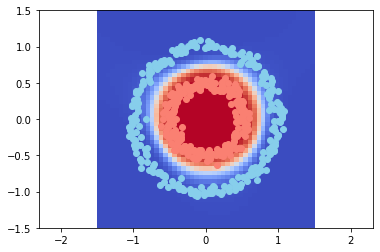

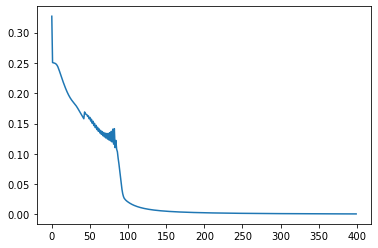

In [13]:
import time
from IPython.display import clear_output

#p definido al principio de este documento, al igual que x e y
topologia = [p, 4, 1]
#Función de activación definida desupués de la clase "neural_layer":
redNeuronal = crear_redNeuronal(topologia, sigmoide)

#Matriz que almacena cada variación entre la salida de la red y lo que esperamos.
loss=[]

for it in range(10000):
  #Entrenamos a la red:
  pY = entrenar(redNeuronal, x, y, i2_cost, lr=0.03)
  #Con "pY" podremos comparar la salida de nuestra Red Neuronal con los valores que esperamos realmemente.

  if it%25 == 0: #Cada 25 iteraciones o ciclos, vemos:
    loss.append(i2_cost[0](pY, y))

    #Resolución de nuestro gráfico:
    res=50
    #Valores aleatorios para hacer la gráfica base:
    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)
    _Y = np.zeros((res, res))

    #Ahora guardaremos
    for ix0, x0 in enumerate(_x0):
      for ix1, x1 in enumerate(_x1):
        _Y[ix0, ix1] = entrenar(redNeuronal, np.array([[x0, x1]]), y, i2_cost, train=False)[0][0] #Aquí no entrenamos la red.
        #Solo es para hacer predicciones de como la red neuronal está clasificando ambos conjuntos de puntos.

    #Aquí comenzamos creando la gráfica, como en el anterior ejercicio:
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm") #Coloreando superficies.
    plt.axis("equal") #Proporcionamos los ejes.

    #Esto está al principio y es para visualizar nuestro conjunto de datos:
    plt.scatter(x[y[:, 0]==0, 0], x[y[:, 0]==0, 1], c="skyblue")
    plt.scatter(x[y[:, 0]==1, 0], x[y[:, 0]==1, 1], c="salmon")

    #No explico mucho pero básicamente borra y vuelve a hacer el dibujo dandole un efecto como de animado:
    clear_output(wait=True)
    plt.show() #Mostramos el primer gráfico con las superficies y nuestros puntos.
    plt.plot(range(len(loss)), loss)
    plt.show() #Mostramos un segundo gráfico de como el error se va comportando.
    time.sleep(0.1) #Y un pequeño tiempo de descanso para la CPU xD